In [24]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("DifferentialEquations")
Pkg.add("Optimization")
Pkg.add("OptimizationOptimJL")
Pkg.add("OptimizationBBO")
Pkg.add("DiffEqParamEstim")
Pkg.add("StatsBase")
Pkg.add("SciMLSensitivity")

   Resolving package versions...
  No Changes to `/blue/ferrallm/kelbakkouri/Project.toml`
  No Changes to `/blue/ferrallm/kelbakkouri/Manifest.toml`
   Resolving package versions...
  No Changes to `/blue/ferrallm/kelbakkouri/Project.toml`
  No Changes to `/blue/ferrallm/kelbakkouri/Manifest.toml`
   Resolving package versions...
  No Changes to `/blue/ferrallm/kelbakkouri/Project.toml`
  No Changes to `/blue/ferrallm/kelbakkouri/Manifest.toml`
   Resolving package versions...
  No Changes to `/blue/ferrallm/kelbakkouri/Project.toml`
  No Changes to `/blue/ferrallm/kelbakkouri/Manifest.toml`
   Resolving package versions...
  No Changes to `/blue/ferrallm/kelbakkouri/Project.toml`
  No Changes to `/blue/ferrallm/kelbakkouri/Manifest.toml`
   Resolving package versions...
  No Changes to `/blue/ferrallm/kelbakkouri/Project.toml`
  No Changes to `/blue/ferrallm/kelbakkouri/Manifest.toml`
   Resolving package versions...
  No Changes to `/blue/ferrallm/kelbakkouri/Project.toml`
  No Chan

In [2]:
# Here are all the packages I used
using StatsBase
using CSV
using Plots
using DataFrames
using DifferentialEquations
using SciMLSensitivity
using LsqFit
using DifferentialEquations, RecursiveArrayTools, Plots, DiffEqParamEstim
using Optimization, ForwardDiff, OptimizationOptimJL, OptimizationBBO

# Label your file names Here I have labelled my resistent cells, my naive cells and the treated resistent cells, and resistent naive cells
# I recommend labelling with very easy names 
GFP = "ProcessedCIS.csv"
RFP = "ProcessedRFP.csv"
GFPT = "ProcessedCISTreated.csv"
RFPT = "ProcessedRFPTreated.csv"

"ProcessedRFPTreated.csv"

In [7]:

df = CSV.read(RFP, DataFrame)

x = []  # Will store day numbers
y = []  # Will store day averages

current_day = 1
for row in eachrow(df)
    day_average = row[:"Day Averages"]
    if !ismissing(day_average) && !isempty(strip(string(day_average)))
        push!(x, current_day)
        push!(y, day_average)
        current_day += 1
    end
end

println("These are the x data points: ", x)
println("These are the y data points: ", y)

These are the x data points: Any[1, 2, 3, 4, 5, 6, 7, 8, 9]
These are the y data points: Any[102.0702381, 180.1666667, 337.1789683, 642.6911508, 1395.908452, 2555.689365, 2752.577738, 3714.772857, 4022.995833]


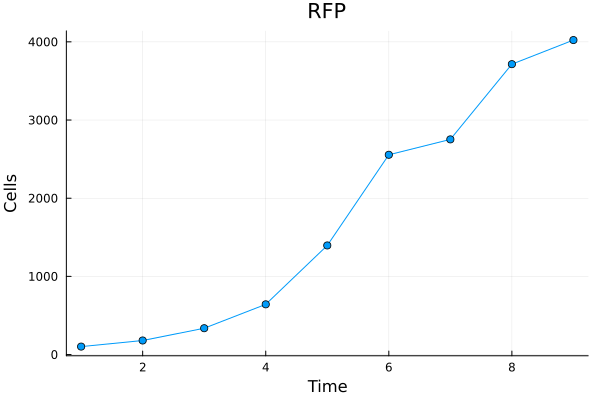

In [8]:
p = plot(x, y, #THESE ARE THE LISTS
     title="RFP", 
     xlabel="Time", 
     ylabel="Cells", 
     marker=:circle, 
     line=:solid,
     legend=false)

display(p)

I find it very useful to plot all your data so you understand what it looks like. This is my version of this. 

In [25]:
function f_withoutD(du, u, p, t)
    r, k, d = p
    du[1] = u[1] * r * (1 - u[1] / k)
end

solver = Tsit5()
start, stop = 1.0, 10.0 #make sure to update to your range of values
tspan = (start, stop)
u0 = [y[1]] #This is the initial point, usually the first data point
p = [0.5, maximum(y), 0.5] #I have three paramete

println("Print the tspan: ", tspan)
println("This is your starting condition: ", u0)
println("This is the set of parameters: ", p)

Print the tspan: (1.0, 10.0)
This is your starting condition: [102.0702381]
This is the set of parameters: [0.5, 4022.995833, 0.5]


In [26]:
prob = ODEProblem(f_withoutD, u0, tspan, p)  # Declare initial problem
println("This is what the problem looks like: ", prob)

This is what the problem looks like: ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(f_withoutD), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}(ODEFunction{true, SciMLBase.AutoSpecialize, typeof(f_withoutD), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}(f_withoutD, LinearAlgebra.UniformScaling{Bool}(true), nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, SciMLBase.DEFAULT_OBSERVED, nothing, nothing, nothing, nothing), [102.0702381], (1.0, 10.0), [0.5, 4022.9958

In [27]:
sol = solve(prob, Tsit5(), saveat=x)  # Solve the ODE
println("This is what the solution x values look like: ", sol.t)
println("This is what the solution y values of sol(2) look like: ", sol[2])

This is what the solution x values look like: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
This is what the solution y values of sol(2) look like: [165.56037548720528]


In [28]:
cost_function = build_loss_objective(prob, solver, L2Loss(x, y), Optimization.AutoForwardDiff(), maxiters=10000, verbose=false)  # Define the cost function
println("Feel free to print this but it looks like non-sense")

Feel free to print this but it looks like non-sense


In [29]:
optprob = Optimization.OptimizationProblem(cost_function, p)  # Define the optimization problem
println("This is what the solution x optprob looks like: ", optprob[1])

This is what the solution x optprob looks like: 0.5


In [30]:
optsol = solve(optprob, BFGS())  # Solve the optimization problem
println("This is what the solution x(2) optsol looks like: ", optsol[2])

This is what the solution x(2) optsol looks like: 4429.69798783949


In [31]:
optimized_params = optsol.minimizer  # Access optimized parameters
println("This is what the solution optparams looks like: ", optimized_params)

This is what the solution optparams looks like: [0.7528740060871077, 4429.69798783949, 0.5]


In [39]:
optimized_prob = ODEProblem(f_withoutD, [y[1]], tspan, optimized_params)  # New ODE problem with optimized parameters
println("This is what the solution x(2) optsol looks like: ", optimized_prob)

This is what the solution x(2) optsol looks like: ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(f_withoutD), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}(ODEFunction{true, SciMLBase.AutoSpecialize, typeof(f_withoutD), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}(f_withoutD, LinearAlgebra.UniformScaling{Bool}(true), nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, SciMLBase.DEFAULT_OBSERVED, nothing, nothing, nothing, nothing), [102.0702381], (1.0, 10.0), [0

In [36]:
xdata_dense = range(x[1], x[end], length=1000)  # 1000 points in range
println(xdata_dense)

1.0:0.008008008008008008:9.0


In [40]:
optimized_sol = solve(optimized_prob, solver, reltol=1e-15, abstol=1e-15, saveat=xdata_dense)  # Solve with optimized parameters
println("This is the optimized solution: ", optimized_sol[2])
#NOTE THAT EACH OF THE NUMBERS IS A Y Points



This is the optimized solution: [102.67317385750916]


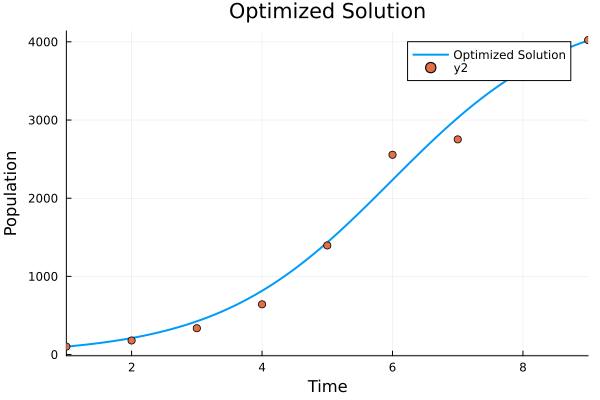

In [43]:
# Create the plot
p = plot(optimized_sol, 
         xlabel="Time", 
         ylabel="Population", 
         title="Optimized Solution", 
         label="Optimized Solution",
         linewidth=2, 
         gridlinewidth=0.5, 
         grid=true,
         legend=:topright)
scatter!(x, y)

# Display the plot
display(p)